In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression

In [16]:
train = pd.read_csv('train.csv', sep = ',')

In [20]:
train.set_index('PassengerId', inplace = True, drop = True)

In [63]:
def parse_model_0(X):
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch']]
    return X, target
X, y = parse_model_0(train.copy())

In [62]:
def compute_score(clf, X, y):
    xval = cross_val_score(clf, X, y, cv = 5)
    return np.mean(xval)

In [64]:
lr = LogisticRegression()
compute_score(lr, X, y)

0.67454885776833495

In [65]:
lr.fit(X, y)
a = [1, 2, 3]
b = lr.coef_[0]
b

array([ 0.01624874, -0.2456153 ,  0.15536342])

<IPython.core.display.Javascript object>


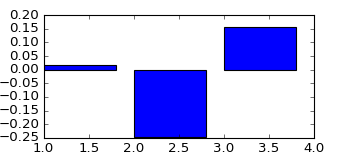

In [67]:
plt.bar(a, b)
plt.show()

In [29]:
survived = train[train.Survived == 1]
dead = train[train.Survived == 0]

<IPython.core.display.Javascript object>


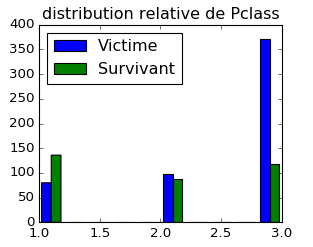

In [40]:
def plot_hist(feature, bins = 10):
    x1 = np.array(dead[feature].dropna())
    x2 = np.array(survived[feature].dropna())
    plt.hist([x1, x2], label = ['Victime', 'Survivant'])
    plt.legend(loc = 'upper left')
    plt.title('distribution relative de %s' %feature)
    plt.show()
plot_hist('Pclass')

In [68]:
def parse_model_1(X):
    target = X.Survived
    class_dummies = pd.get_dummies(X['Pclass'], prefix = 'Pclass')
    X = X.join(class_dummies)
    to_del = ['Name', 'Age', 'Cabin', 'Embarked', 'Survived', 'Ticket', 'Sex', 'Pclass']
    for col in to_del: del X[col]
    return X, target
X, y = parse_model_1(train.copy())
compute_score(lr, X, y)

0.6926591973081655

In [72]:
lr.fit(X, y)
a = [1, 2, 3, 4, 5, 6]
b = lr.coef_[0]
b

array([-0.150896  ,  0.23357229,  0.00669907,  0.3730938 ,  0.100852  ,
       -0.85258357])

<IPython.core.display.Javascript object>


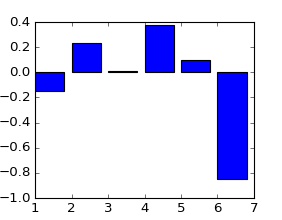

In [73]:
plt.bar(a, b)
plt.show()